In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np

In [67]:
img = mpimg.imread("8BitDeckAssets.png")
bimg = mpimg.imread("gameboard.png")
#cards are 33*45 pixels big
#

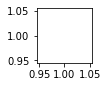

In [16]:
plt.figure(figsize = (1,1))
plt.plot([1],[1])

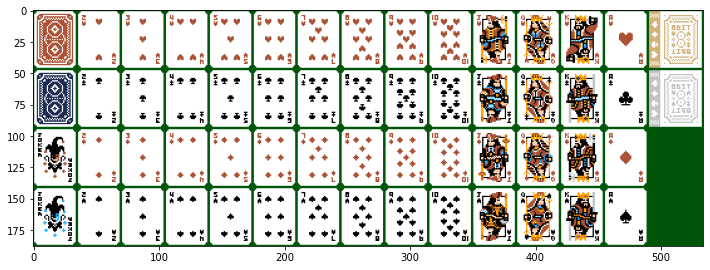

In [63]:
plt.figure(figsize = (12,15))
plt.imshow(img)

In [11]:
img.shape

(188, 534, 4)

In [21]:
len((1,2))

2

In [42]:
1 in {2:1}

False

In [70]:
card_dict = {2:"2", "two":"2", "2":"2",
            3:"3", "three":"3", "3":"3",
            4:"4", "four":"4", "4":"4",
            5:"5", "five":"5", "5":"5",
            6:"6", "six":"6", "6":"6",
            7:"7", "seven":"7", "7":"7",
            8:"8", "eight":"8", "8":"8",
            9:"9", "nine":"9", "9":"9",
            10:"10", "ten":"10", "10":"10",
            "jack":"j", "queen":"q", "q":"q", "j":"j",
            "king":"k", "ace":"a", "k":"k", "a":"a"}

suit_dict = {"spade":"spade", "spades":"spade",
            "heart":"heart", "hearts":"heart",
            "club":"club", "clubs":"club",
            "diamond":"diamond", "diamonds":"diamond"}

p_card_loc_dict = {0:[], 
                   1:[(367, 100)],
                   2:[(349, 100), (386, 100)],
                   3:[(330, 100), (367, 100), (404, 100)],
                   4:[(330, 100), (367, 100), (404, 100), (367, 149)],
                   5:[(330, 100), (367, 100), (404, 100), (349, 149), (386, 149)],
                   6:[(330, 100), (367, 100), (404, 100), (330, 149), (367, 149), (404, 149)]}

d_card_loc_dict = {"up": (92, 100), "down": (129, 100)}

In [103]:
class GameDisplay():
    def __init__(self, card_image, board_image):
        self.player_cards = []
        self.player_card_count = 0
        self.dealer_cards = {"up":None, "down":None}
        self.card_img = card_image
        self.ref_img = board_image
        self.board_img = board_image
        self.deck_color = "red"
        
    def validate_card_(self, card):
        if (isinstance(card, tuple) and len(card) == 2) == False:
            raise Exception("'card' should be a tuple of length 2: (value, suit)")
        if (card[0] in card_dict) == False:
            raise Exception("Please provide a valid card")
        if (card[1] in suit_dict) == False:
            raise Exception("Please provide a valid suit")
        return (card_dict[card[0]], suit_dict[card[1]])
        
    def add_dealer_card(self, card, facing):
        """
        card: tuple | (value, suit)
        facing: str | "up", "down"
        """
        if (facing in ["up", "down"]) == False:
            raise Exception("'facing' must be 'up' or 'down'")
            
        c = self.validate_card_(card)
        self.dealer_cards[facing] = c
        
    def add_player_card(self, card):
        """
        card: tuple | (value, suit)
        """
        if len(self.player_cards) >= 6:
            raise Exception("Can't draw more than 6 cards!")
        c = self.validate_card_(card)
        self.player_cards.append(c)
        self.player_card_count = len(self.player_cards)
        
    def change_deck_color(self):
        if self.deck_color == "red":
            self.deck_color = "blue"
        elif self.deck_color == "blue":
            self.deck_color = "red"
            

    def get_card_ary_(self, card):
        """
        Returns the image array of the specified card
        """
        val = card[0]
        suit = card[1]
        column = {"2":1, "3":2, "4":3, "5":4, "6":5, "7":6, "8":7, "9":8, "10":9, "j":10, "q":11, "k":12, "a":13}[val]
        row = {"heart":0, "club":1, "diamond":2, "spade":3}[suit]
        pr = 1 + 47*row
        pc = 1 + 35*column
        return self.card_img[pr:pr+45, pc:pc+33]
    
    def place_card_(self, ary, x, y):
        """
        Places card at pixel location (x, y) on board, top left being (0, 0) 
        """
        try:
            self.board_img[y:y+45, x:x+33] = ary
        except:
            raise Exception("'ary' must be a 33x45 pixel image array. Try using output from GameBoard.get_card_ary_()")
            
    def draw(self):
        
        self.board_img = self.ref_img
        
        for ci in range(self.player_card_count):
            ary = self.get_card_ary_(self.player_cards[ci])
            x = p_card_loc_dict[self.player_card_count][ci][0]
            y = p_card_loc_dict[self.player_card_count][ci][1]
            self.place_card_(ary, x, y)
            
        ary = self.get_card_ary_(self.dealer_cards["up"])
        self.place_card_(ary, 92, 100)
        
        if self.deck_color == "red":
            ary = self.card_img[1:46, 1:34]
        elif self.deck_color == "blue":
            ary = self.card_img[48:93, 1:34]
        self.place_card_(ary, 129, 100)
        
        plt.figure(figsize = (12, 15))
        plt.imshow(self.board_img)

In [104]:
plt.imshow(GameDisplay(img).get_card_ary_(1,3))

TypeError: __init__() missing 1 required positional argument: 'board_image'

In [105]:
g = GameDisplay(img, bimg)
g.add_dealer_card(("2","heart"), "up")
g.add_dealer_card(("a", "spade"), "down")
g.add_player_card(("4", "diamond"))
g.add_player_card(("j", "heart"))

In [106]:
g.dealer_cards

{'up': ('2', 'heart'), 'down': ('a', 'spade')}

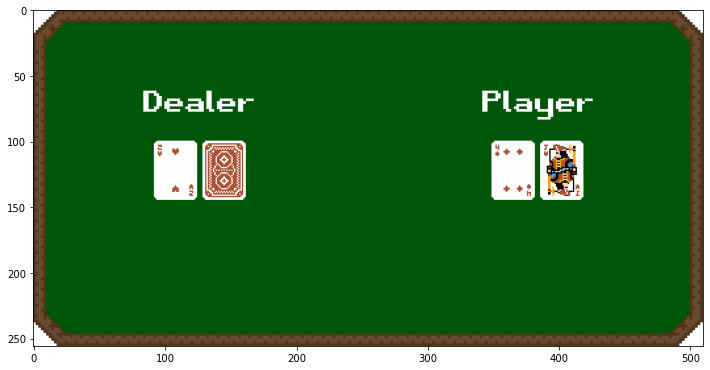

In [107]:
g.draw()

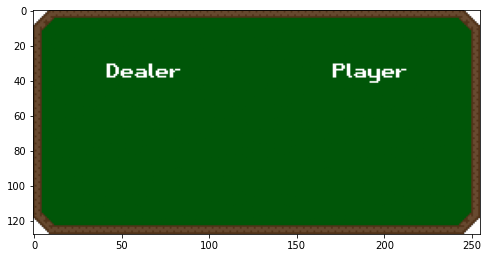

In [66]:
plt.figure(figsize = (8,12))
plt.imshow(bimg)